In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Chargement des données
df = pd.read_csv('Iris.csv')
df = df[df['Species'] != 'Iris-virginica']  # Supprimer la 3e classe
df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})

# Sélection des features (ex. sepal_length et petal_length)
X = df[['SepalLengthCm', 'PetalLengthCm']].values
y = df['Species'].values

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        return [1 if (np.dot(x, self.weights) + self.bias >= 0) else 0 for x in X]

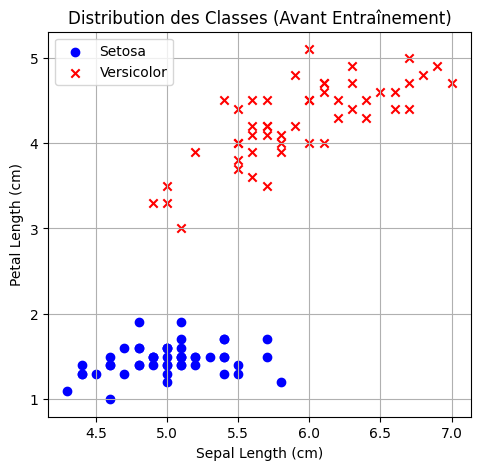

In [3]:
plt.figure(figsize=(12, 5))

# Avant entraînement
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Setosa', marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor', marker='x')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Distribution des Classes (Avant Entraînement)')
plt.legend()
plt.grid(True)


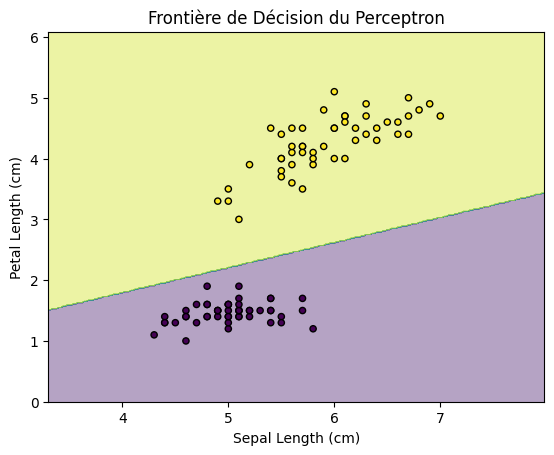

In [4]:

# Entraînement
perceptron = Perceptron(learning_rate=0.01, n_iters=100)
perceptron.fit(X_train, y_train)


# Visualisation des frontières de décision :cite[4]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Frontière de Décision du Perceptron')
plt.show()

In [5]:
from sklearn.metrics import accuracy_score

y_pred = perceptron.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")

Accuracy : 1.00
